In [1]:
#data set
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from scipy import stats

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-100, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\3312851565.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Business Line', y='Net Loss Amount', palette='Set3')


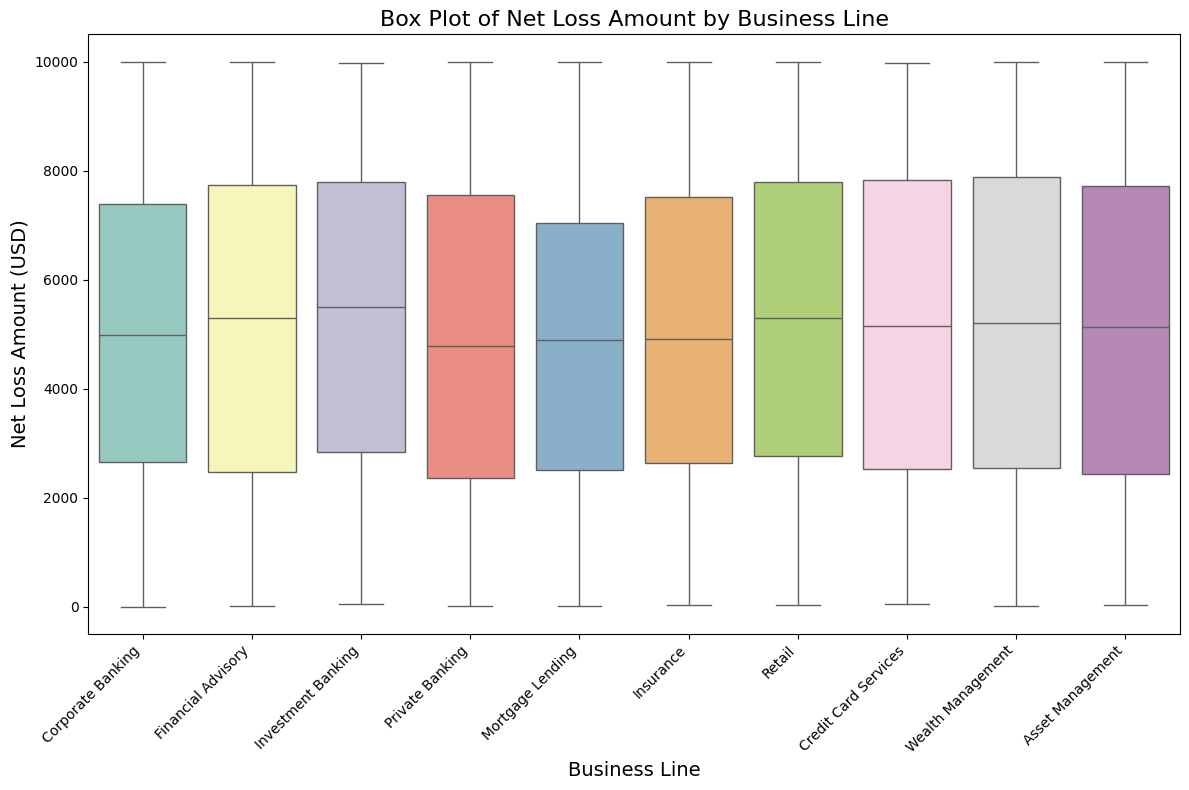

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\3312851565.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x='Event Type', y='Net Loss Amount', palette='coolwarm')


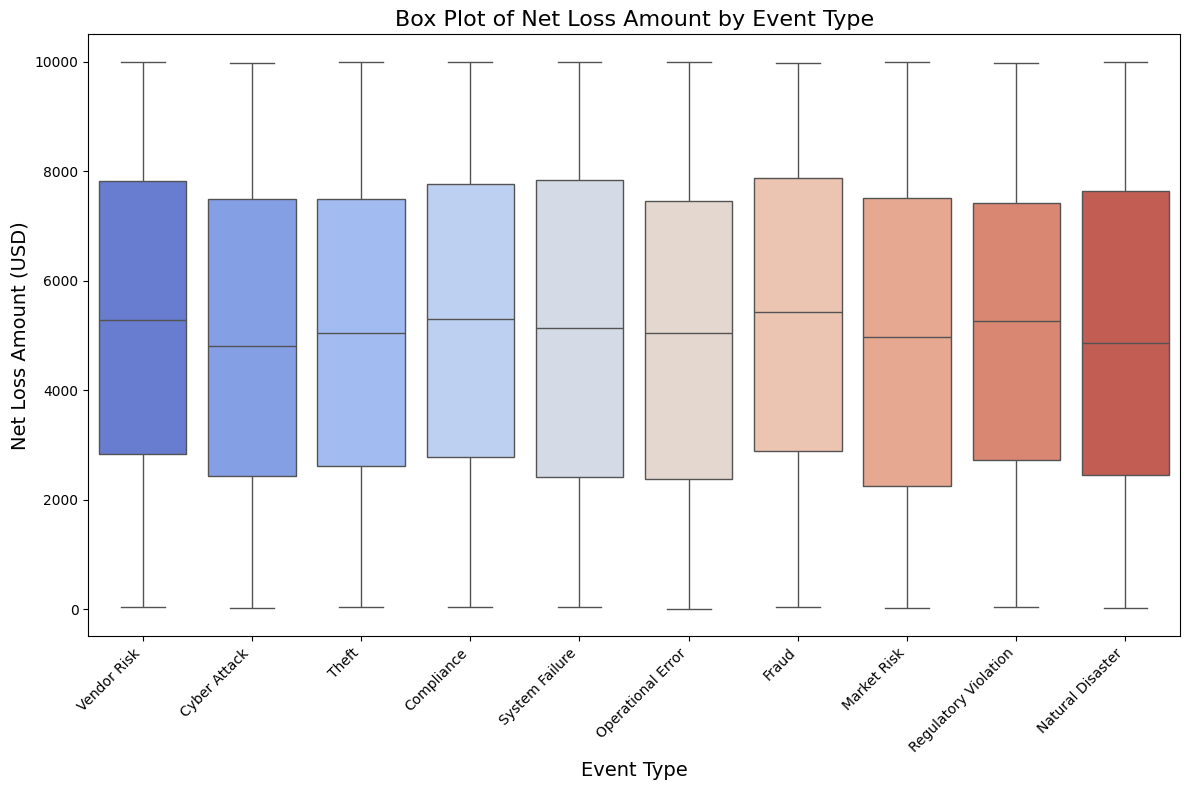

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data to only include positive Net Loss Amounts
df_filtered = df[df['Net Loss Amount'] > 0]

# Boxplot for Net Loss Amount by Business Line
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='Business Line', y='Net Loss Amount', palette='Set3')
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot of Net Loss Amount by Business Line', fontsize=16)
plt.xlabel('Business Line', fontsize=14)
plt.ylabel('Net Loss Amount (USD)', fontsize=14)
plt.tight_layout()
plt.show()

# Boxplot for Net Loss Amount by Event Type
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtered, x='Event Type', y='Net Loss Amount', palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Box Plot of Net Loss Amount by Event Type', fontsize=16)
plt.xlabel('Event Type', fontsize=14)
plt.ylabel('Net Loss Amount (USD)', fontsize=14)
plt.tight_layout()
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2152187668.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Year', y='Net Loss Amount', palette='coolwarm')


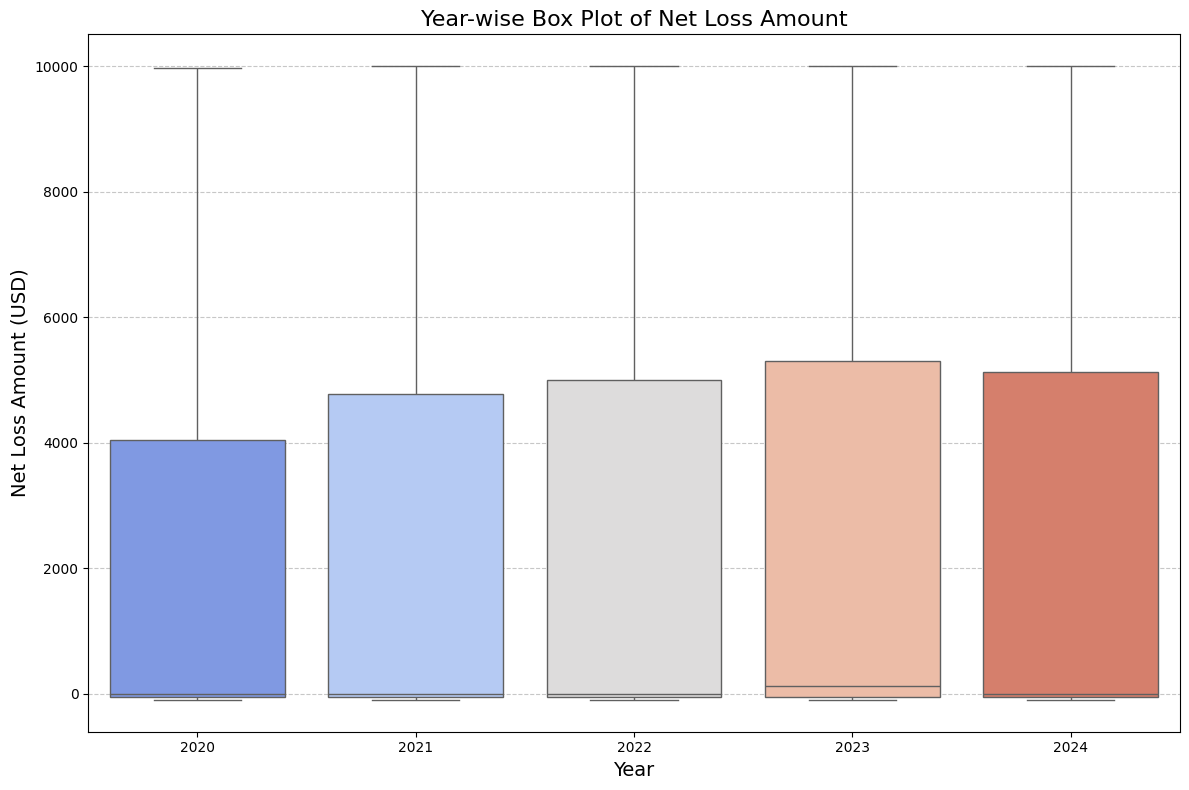

Year-wise Summary Statistics for Net Loss Amount:
       count         mean          std        min        25%         50%  \
Year                                                                       
2020   173.0  2121.577567  3237.261322 -99.783853 -45.903093  -10.769894   
2021  2475.0  2429.154279  3255.917964 -99.920529 -52.381791   -2.585541   
2022  2493.0  2469.810850  3264.612265 -99.973543 -52.729185   -0.879751   
2023  2595.0  2581.507772  3321.197372 -99.857130 -51.646389  127.162674   
2024  2264.0  2471.173281  3265.657173 -99.973543 -48.744965   -2.775648   

              75%          max  
Year                            
2020  4041.469680  9965.973374  
2021  4772.583118  9997.455944  
2022  4997.289632  9994.465507  
2023  5300.901588  9999.844631  
2024  5133.557936  9997.235691  


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# --- Year-wise Box Plot ---
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='Year', y='Net Loss Amount', palette='coolwarm')

# Add titles and labels
plt.title('Year-wise Box Plot of Net Loss Amount', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Net Loss Amount (USD)', fontsize=14)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

# --- Optional: Summary Statistics for Each Year ---
yearly_summary = df.groupby('Year')['Net Loss Amount'].describe()
print("Year-wise Summary Statistics for Net Loss Amount:")
print(yearly_summary)


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\3644599696.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, y='Net Loss Amount', palette='coolwarm')


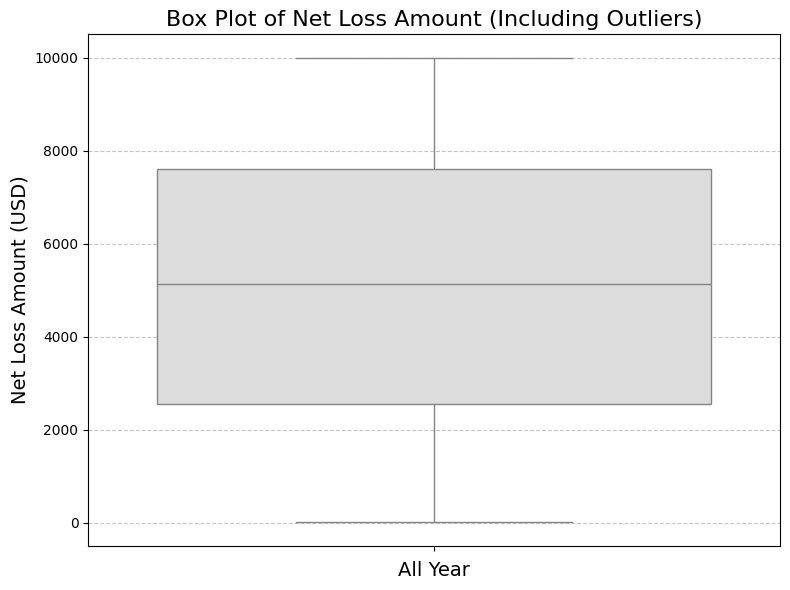

Lower Bound for Outliers: -7719.83
Upper Bound for Outliers: 12729.72
Number of Outliers: 0
Outliers (Sample):
Empty DataFrame
Columns: [Unique Event ID, Net Loss Amount]
Index: []


In [5]:
#full dataset without ionfo
import matplotlib.pyplot as plt
import seaborn as sns
df_filtered = df[df['Net Loss Amount'] > 0]
# --- Box Plot for Outlier Detection ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_filtered, y='Net Loss Amount', palette='coolwarm')
plt.title('Box Plot of Net Loss Amount (Including Outliers)', fontsize=16)
plt.xlabel('All Year', fontsize=14)
plt.ylabel('Net Loss Amount (USD)', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Calculate Outliers ---
# Using IQR to identify outliers
Q1 = df['Net Loss Amount'].quantile(0.25)  # First quartile
Q3 = df['Net Loss Amount'].quantile(0.75)  # Third quartile
IQR = Q3 - Q1  # Interquartile range

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['Net Loss Amount'] < lower_bound) | (df['Net Loss Amount'] > upper_bound)]

# Summary of outliers
print(f"Lower Bound for Outliers: {lower_bound:.2f}")
print(f"Upper Bound for Outliers: {upper_bound:.2f}")
print(f"Number of Outliers: {outliers.shape[0]}")
print("Outliers (Sample):")
print(outliers[['Unique Event ID', 'Net Loss Amount']].head())


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\3644417934.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Net Loss Amount', palette='coolwarm')#, orient='h')


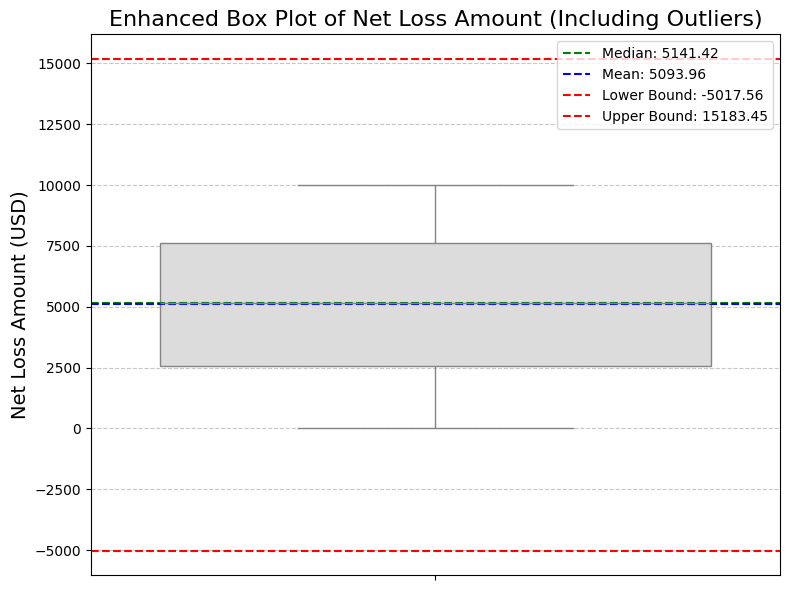

Statistics Summary:
 - Median: 5141.42
 - Mean: 5093.96
 - 1st Quartile (Q1): 2557.82
 - 3rd Quartile (Q3): 7608.07
 - Interquartile Range (IQR): 5050.25
 - Lower Bound for Outliers: -5017.56
 - Upper Bound for Outliers: 15183.45


In [7]:
#with info
import matplotlib.pyplot as plt
import seaborn as sns
df = df[df['Net Loss Amount'] > 0]
# --- Calculate Key Statistics ---
Q1 = df['Net Loss Amount'].quantile(0.25)  # First quartile (25th percentile)
Q3 = df['Net Loss Amount'].quantile(0.75)  # Third quartile (75th percentile)
IQR = Q3 - Q1  # Interquartile range
median = df['Net Loss Amount'].median()
mean = df['Net Loss Amount'].mean()
lower_bound = Q1 - 1.5 * IQR  # Lower bound for outliers
upper_bound = Q3 + 1.5 * IQR  # Upper bound for outliers

# --- Box Plot ---
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='Net Loss Amount', palette='coolwarm')#, orient='h')
plt.title('Enhanced Box Plot of Net Loss Amount (Including Outliers)', fontsize=16)
plt.ylabel('Net Loss Amount (USD)', fontsize=14)

# Highlight key statistics
plt.axhline(median, color='green', linestyle='--', label=f'Median: {median:.2f}')
plt.axhline(mean, color='blue', linestyle='--', label=f'Mean: {mean:.2f}')
plt.axhline(lower_bound, color='red', linestyle='--', label=f'Lower Bound: {lower_bound:.2f}')
plt.axhline(upper_bound, color='red', linestyle='--', label=f'Upper Bound: {upper_bound:.2f}')

# Add legend
plt.legend(loc='upper right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Print Summary ---
print(f"Statistics Summary:")
print(f" - Median: {median:.2f}")
print(f" - Mean: {mean:.2f}")
print(f" - 1st Quartile (Q1): {Q1:.2f}")
print(f" - 3rd Quartile (Q3): {Q3:.2f}")
print(f" - Interquartile Range (IQR): {IQR:.2f}")
print(f" - Lower Bound for Outliers: {lower_bound:.2f}")
print(f" - Upper Bound for Outliers: {upper_bound:.2f}")


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\454934046.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y='Year', x='Net Loss Amount', palette='viridis', orient='h')


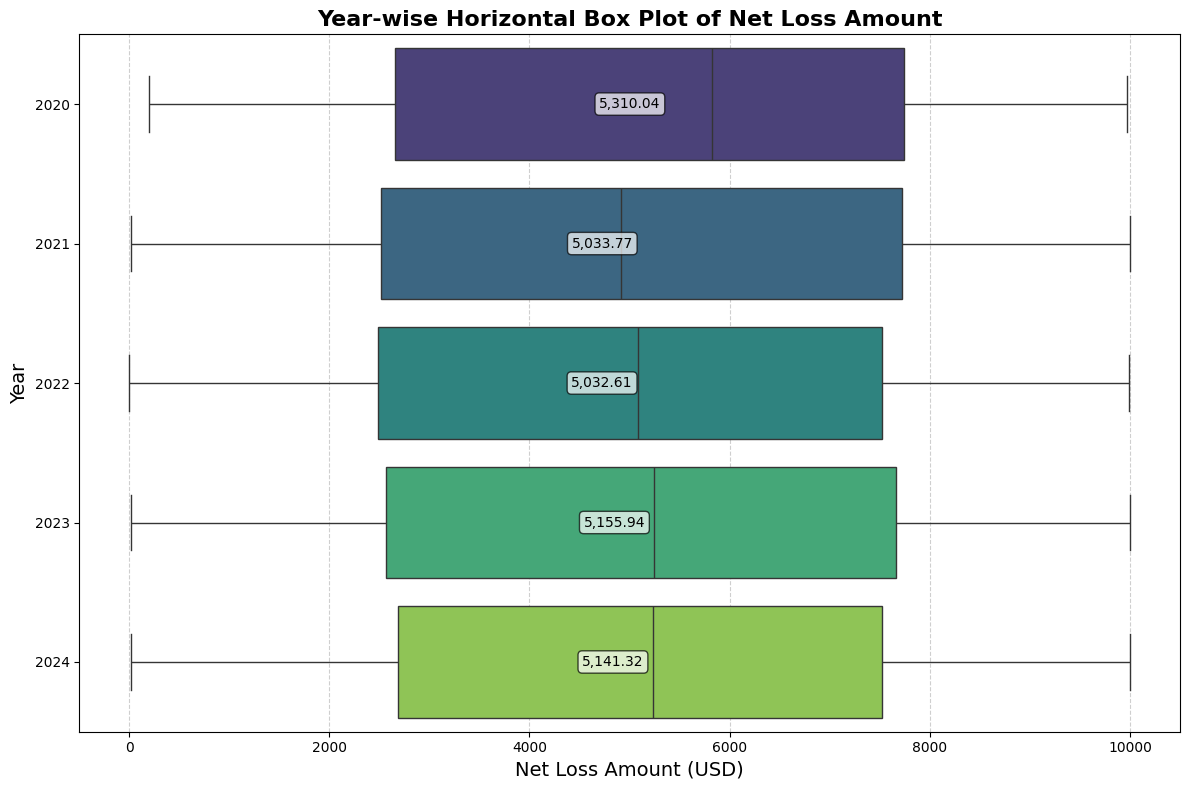

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the year from the Date column
df['Year'] = pd.to_datetime(df['Date']).dt.year

# --- Horizontal Box Plot for Year-wise Net Loss Amount ---
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Year', x='Net Loss Amount', palette='viridis', orient='h')

# Add labels showing the mean value for each year
yearly_means = df.groupby('Year')['Net Loss Amount'].mean()

for i, year in enumerate(yearly_means.index):
    plt.text(
        x=yearly_means[year],  # Position at the mean of Net Loss
        y=i,  # Corresponds to the y-axis position of the year
        s=f"{yearly_means[year]:,.2f}",  # Rounded to 2 decimal places
        color="black",  # Text color
        va="center",  # Align vertically to the center
        ha="right",  # Align horizontally to the right of the bar
        fontsize=10,  # Font size for better visibility
        bbox=dict(boxstyle='round,pad=0.3', edgecolor='black', facecolor='white', alpha=0.7)  # Background for contrast
    )

# Title and labels
plt.title("Year-wise Horizontal Box Plot of Net Loss Amount", fontsize=16, fontweight="bold")
plt.xlabel("Net Loss Amount (USD)", fontsize=14)
plt.ylabel("Year", fontsize=14)

# Add gridlines for better readability
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Layout adjustments
plt.tight_layout()

# Show the plot
plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


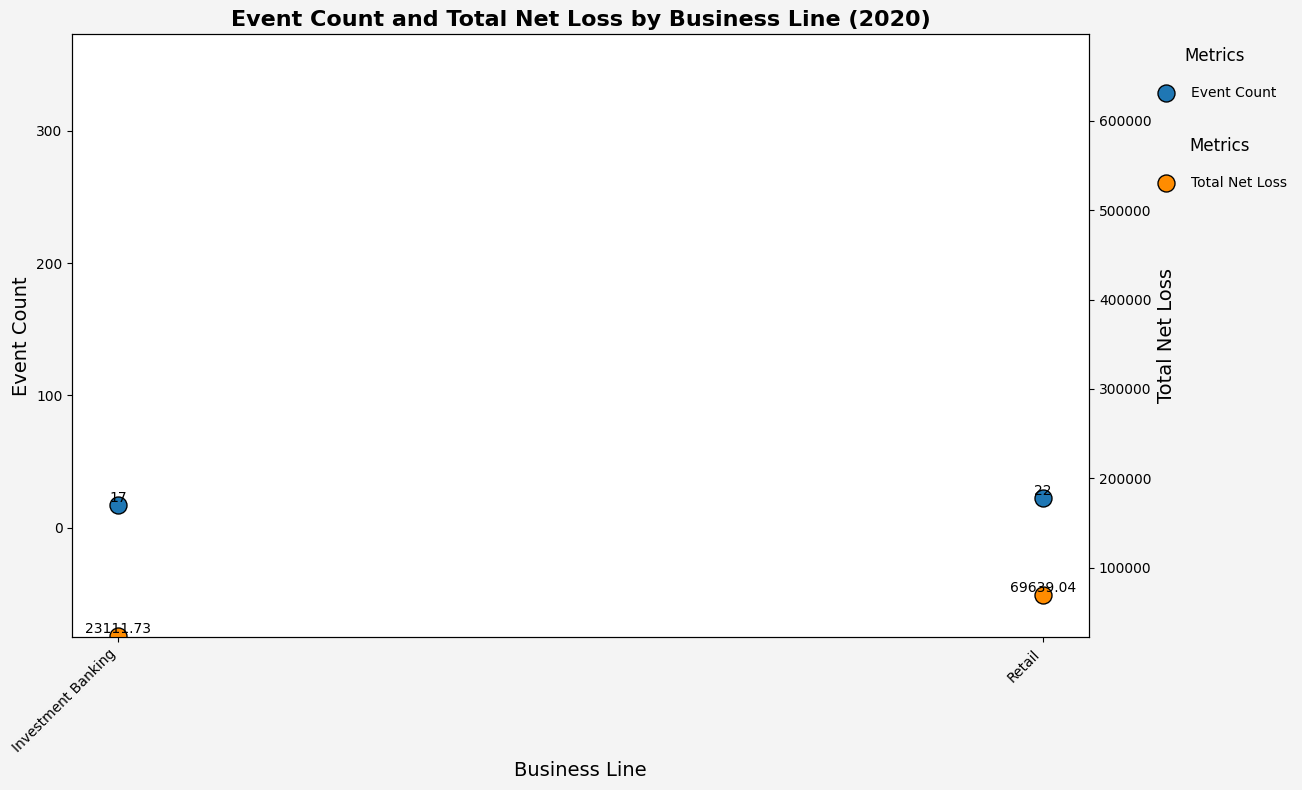

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


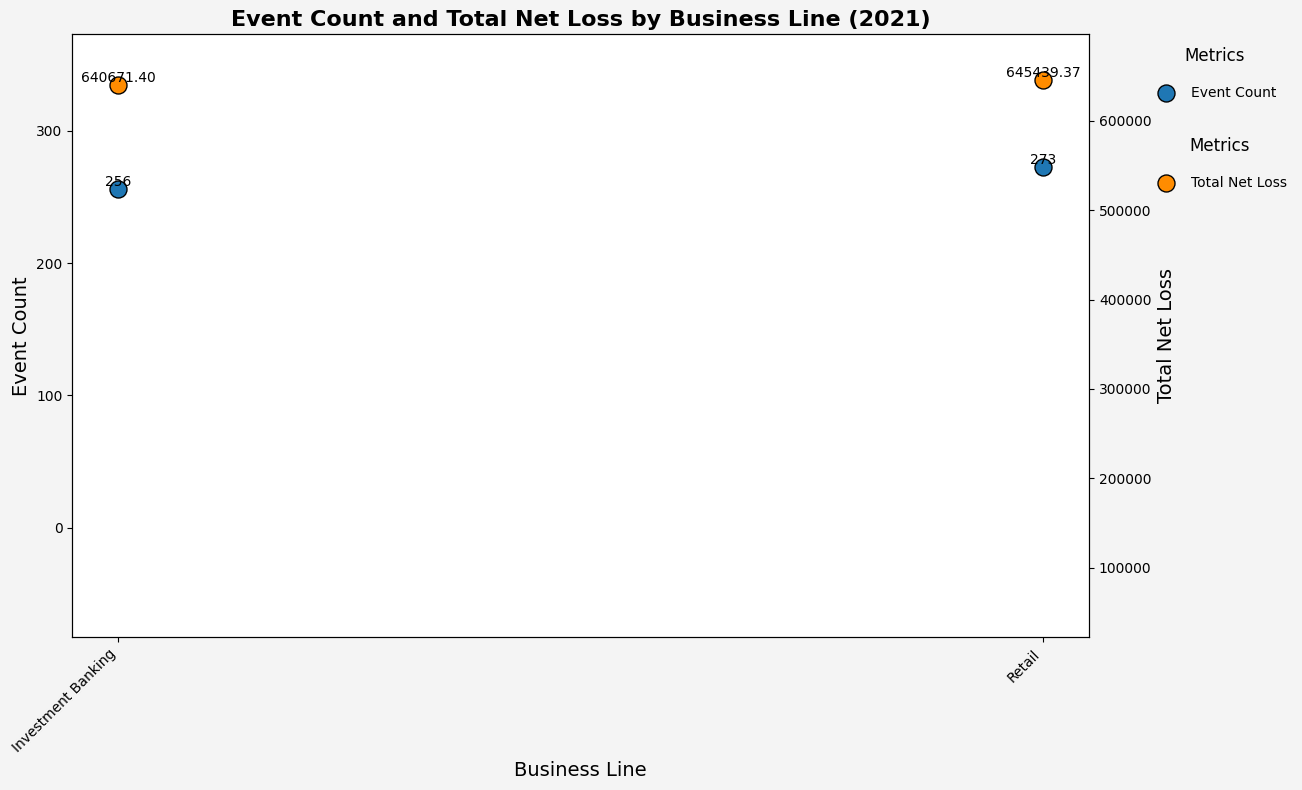

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


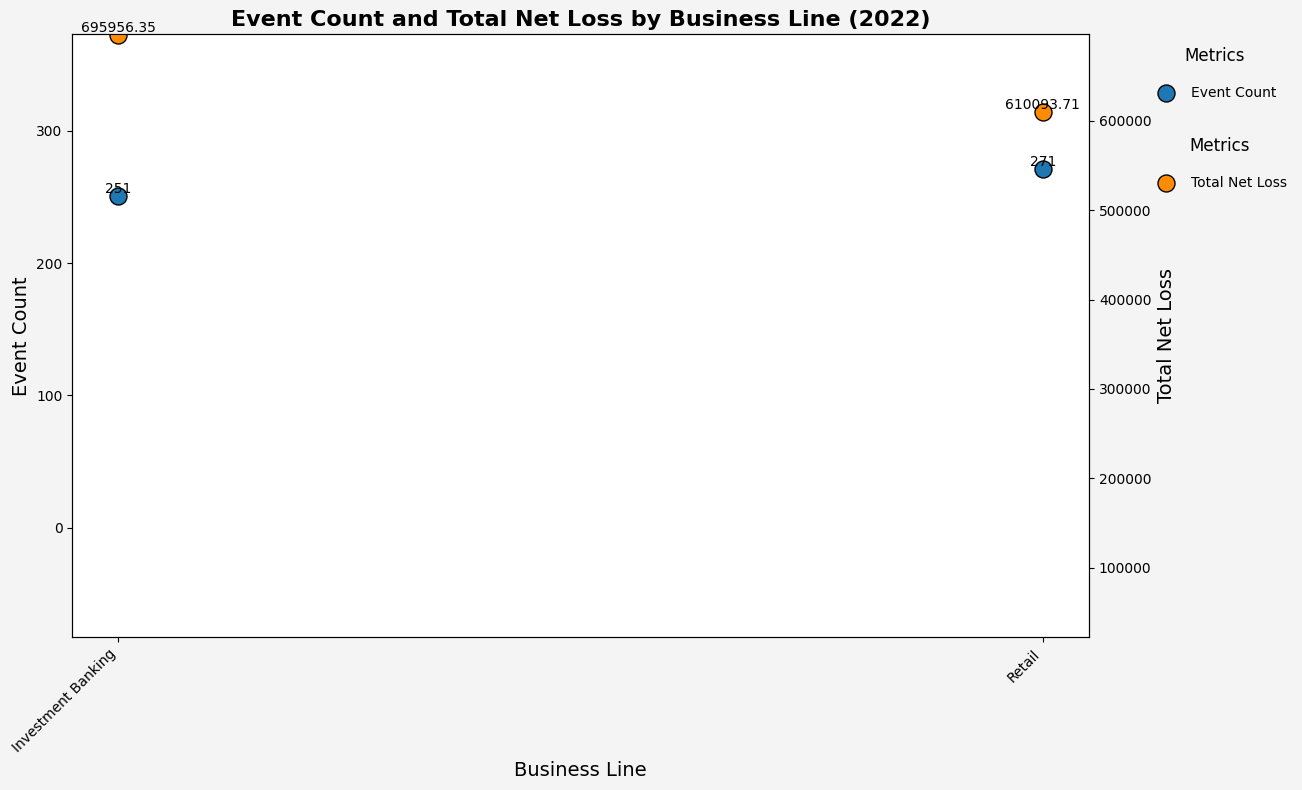

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


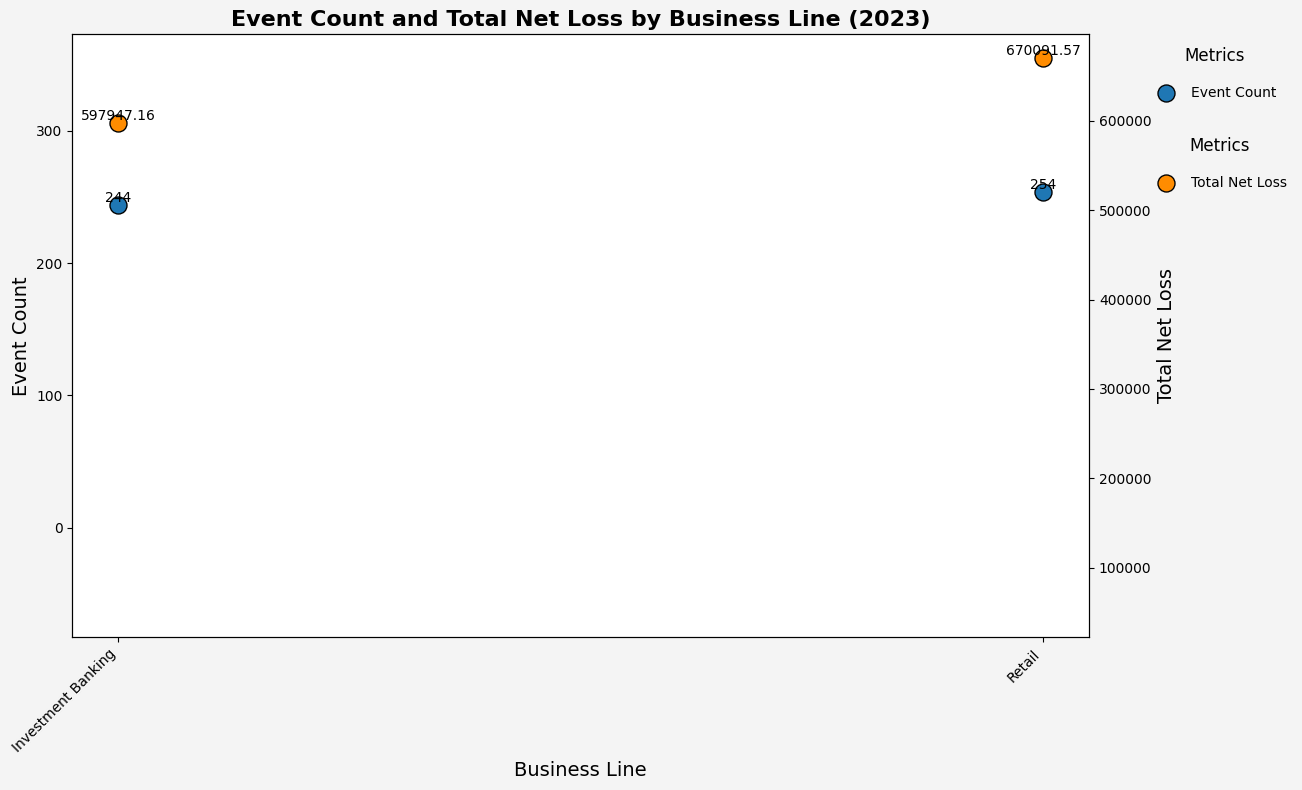

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\4287610166.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


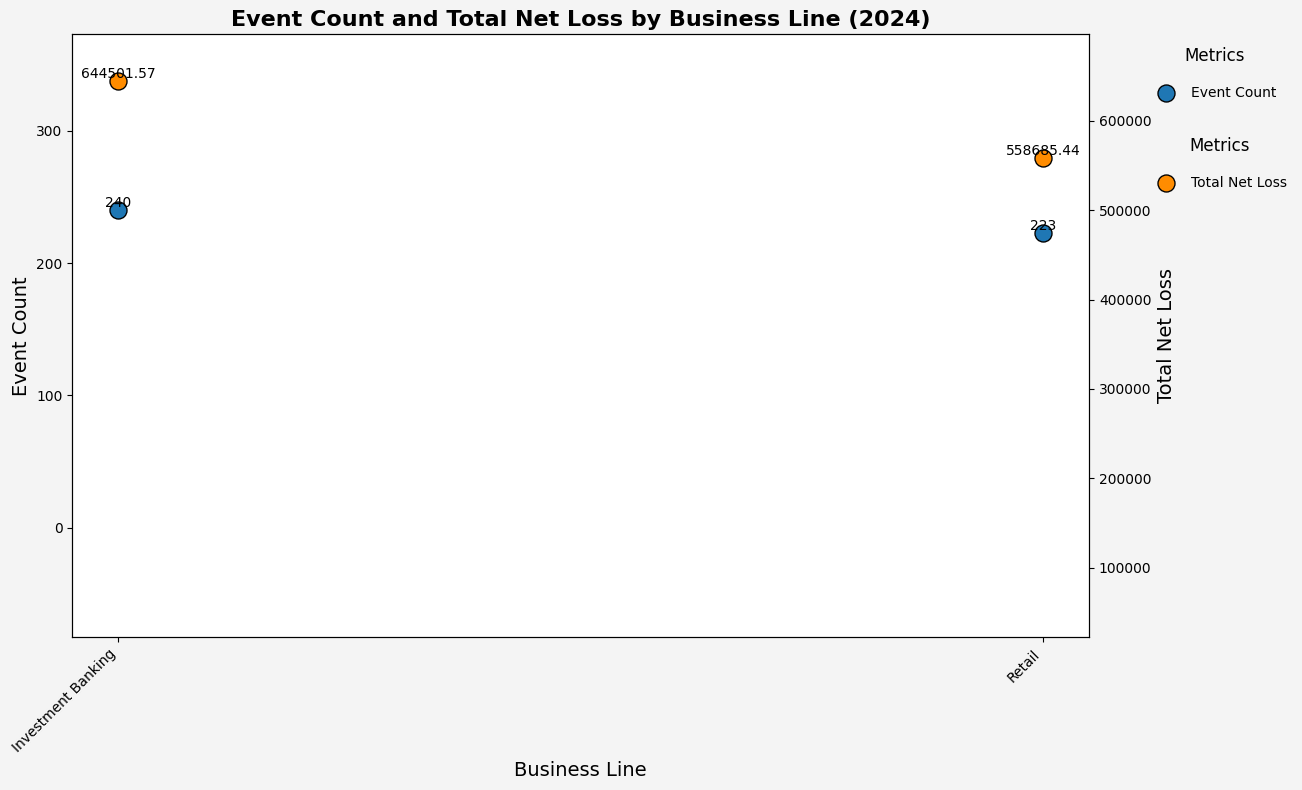

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (only positive values or 0)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values for Net Loss

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Filter for two specific business lines
filtered_business_lines = ["Retail", "Investment Banking"]  # Specify the business lines you are interested in
filtered_df = df[df['Business Line'].isin(filtered_business_lines)]

# Group by Business Line and Year, and calculate total Event Count and Net Loss
yearly_summary = filtered_df.groupby(["Business Line", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years for both Event Count and Total Net Loss
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Business Line", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")

    # Set consistent y-axis limits for Event Count
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Add labels for Event Count
    for i, row in year_data.iterrows():
        ax1.text(
            x=row["Business Line"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set consistent y-axis limits for Total Net Loss
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Add labels for Total Net Loss
    for i, row in year_data.iterrows():
        ax2.text(
            x=row["Business Line"], 
            y=row["Total_Net_Loss"], 
            s=f"{row['Total_Net_Loss']:.2f}",  # Format to two decimal places
            # s=f"{int(row['Total_Net_Loss']):,}", 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10)

    # for i, row in year_data.iterrows():
    #     ax2.text(
    #     x=row["Business Line"] + 0.05,  # Slight offset to the right of the point
    #     y=row["Total_Net_Loss"], 
    #     s=f"{row['Total_Net_Loss']:.2f}",  # Format to two decimal places
    #     color='black',  # Text color for visibility
    #     ha='left',  # Align text to the left
    #     va='center',  # Vertically center the label
    #     fontsize=10
    # )

            





            
        

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Business Line ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()


C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


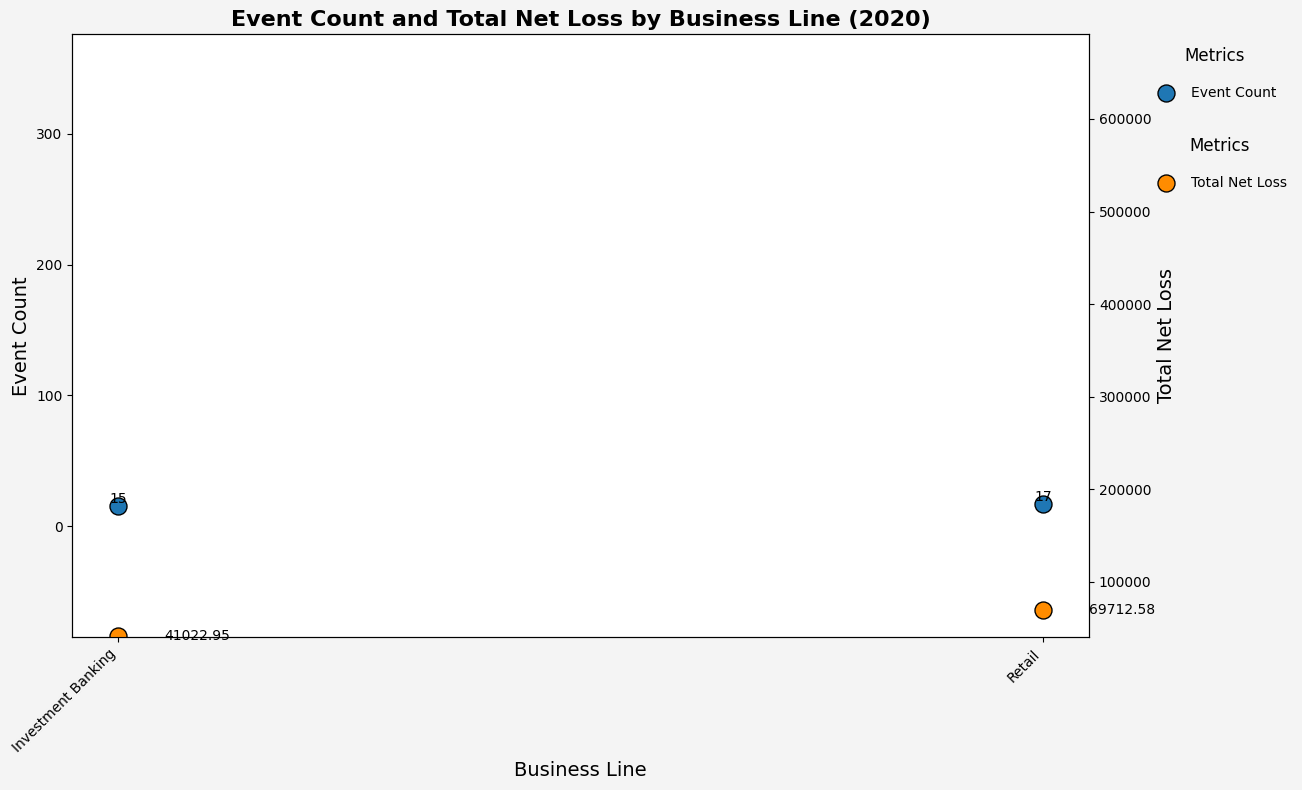

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


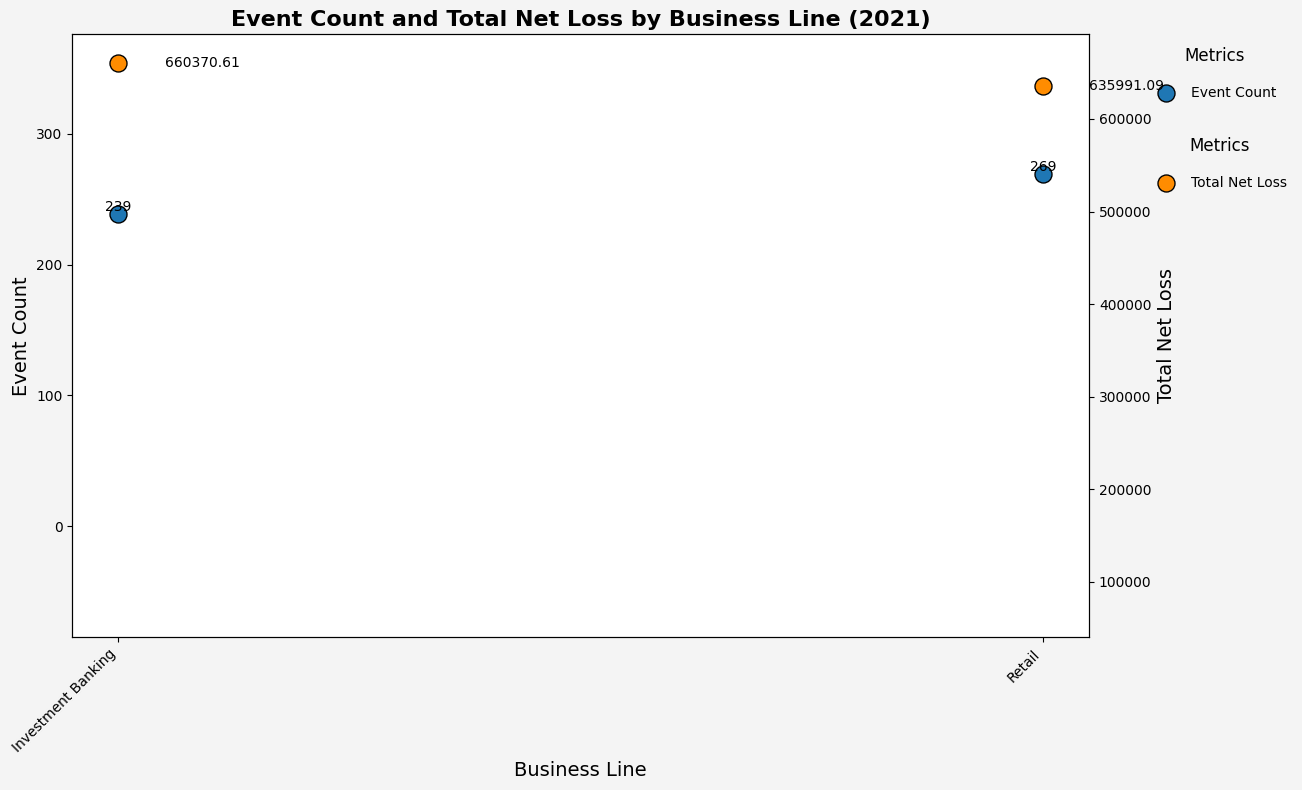

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


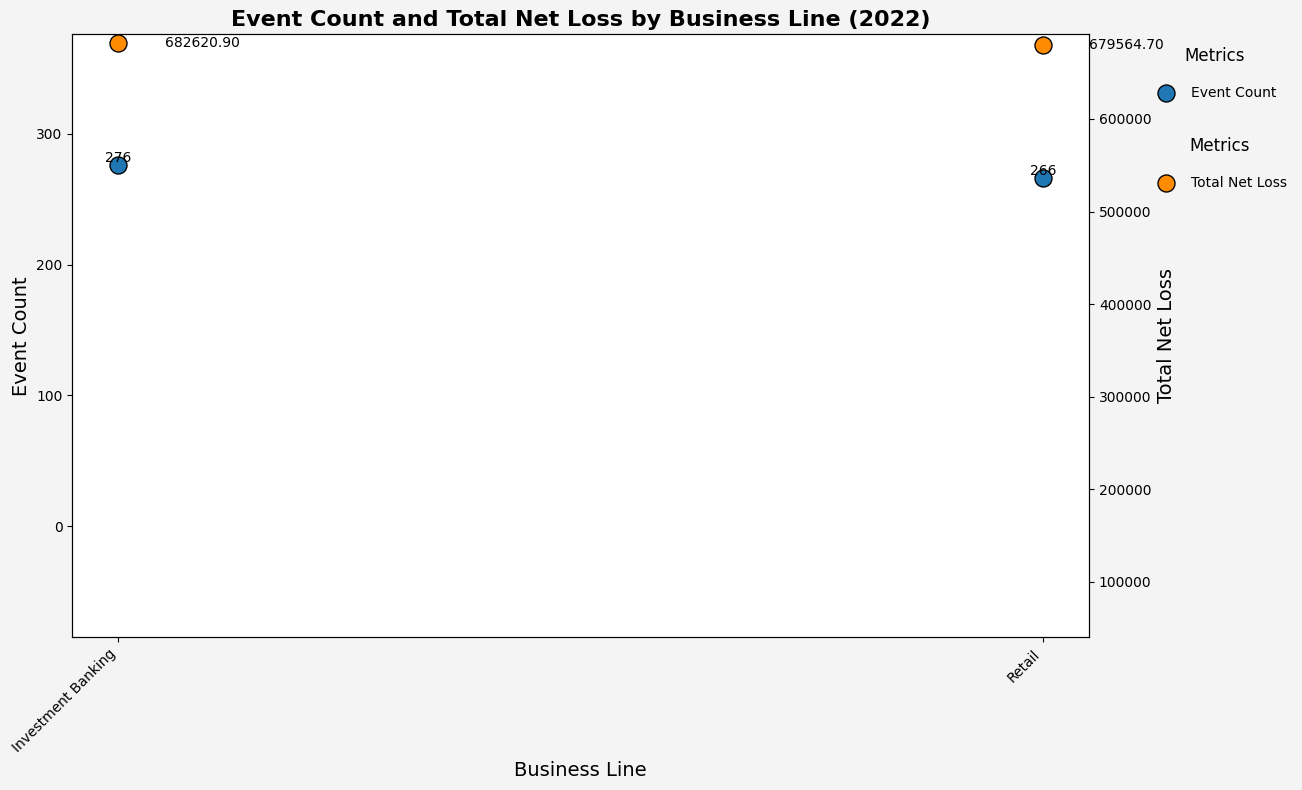

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


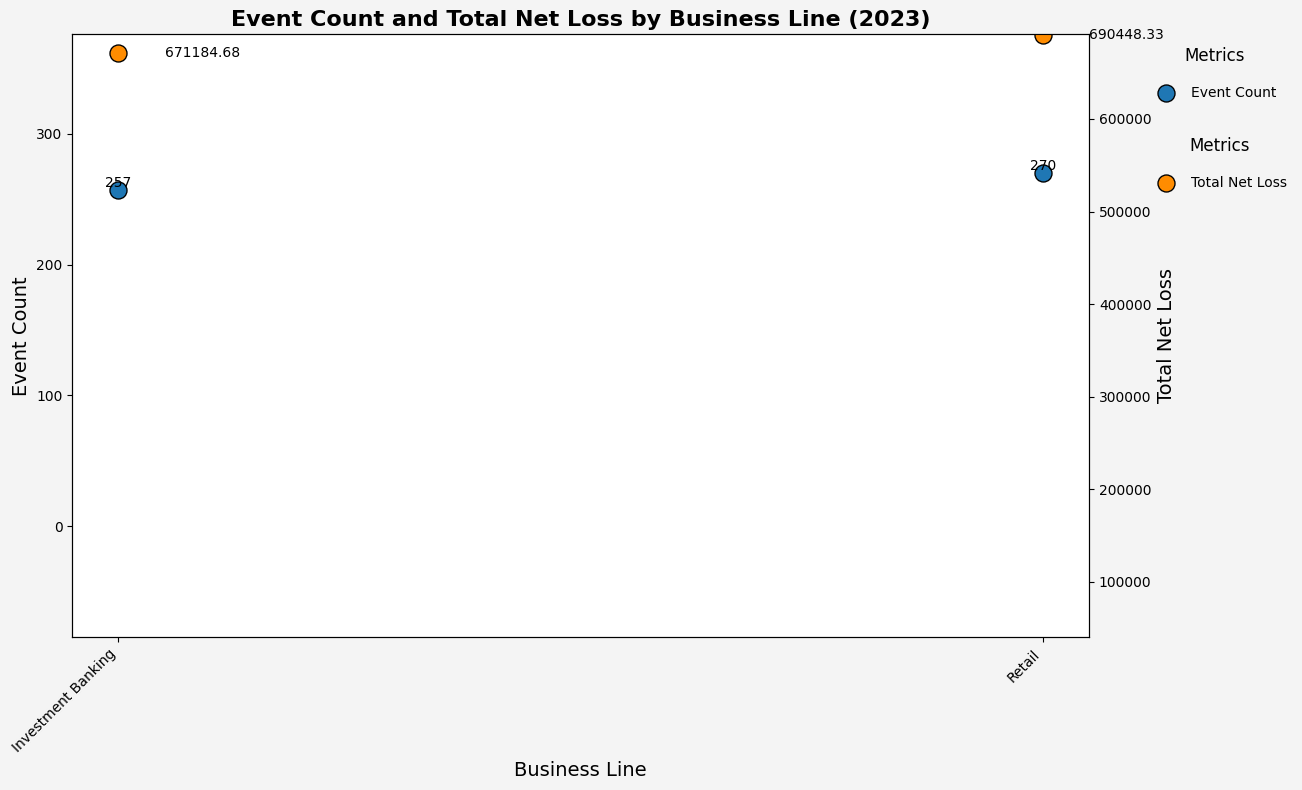

C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:86: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(
C:\Users\Himanshu Singh\AppData\Local\Temp\ipykernel_23156\2281337636.py:99: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")


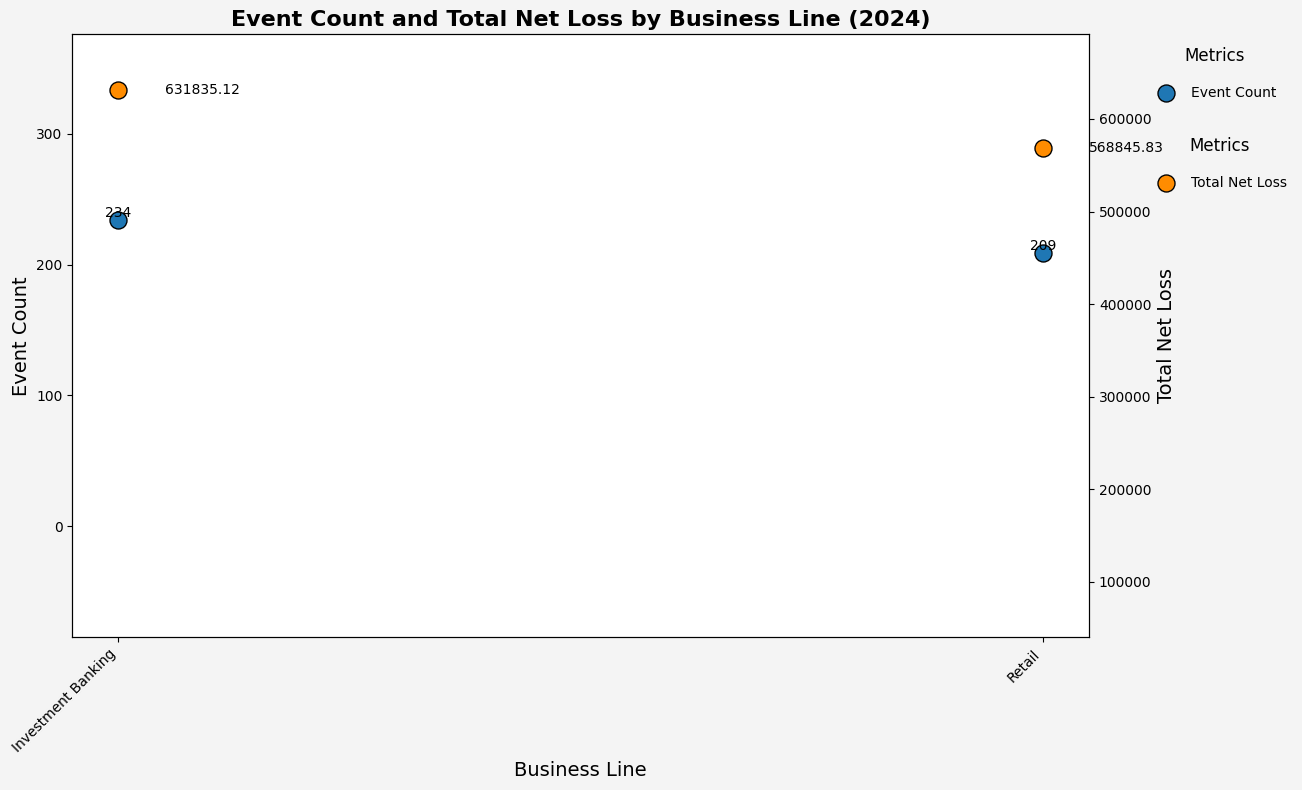

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Function to generate random dates
def random_dates(start, end, n=10):
    return [start + timedelta(days=np.random.randint(0, (end - start).days)) for _ in range(n)]

# Parameters
num_records = 10000
start_date = datetime.now() - timedelta(days=4*365)
end_date = datetime.now()

# Expanded categories
business_lines = [
    "Retail", "Corporate Banking", "Investment Banking", "Insurance",
    "Wealth Management", "Asset Management", "Private Banking",
    "Credit Card Services", "Mortgage Lending", "Financial Advisory"
]

event_types = [
    "Fraud", "System Failure", "Theft", "Compliance", "Natural Disaster",
    "Cyber Attack", "Market Risk", "Operational Error", "Vendor Risk", "Regulatory Violation"
]

# Generate data
data = {
    "Date": random_dates(start_date, end_date, num_records),
    "Unique Event ID": [f"EID{str(i).zfill(5)}" for i in range(num_records)],
    "Event Type": np.random.choice(event_types, num_records),
    "Business Line": np.random.choice(business_lines, num_records),
    "Event Description": np.random.choice(
        [
            "Unauthorized transaction", "Server downtime", "Lost assets", 
            "Regulatory fines", "Data breach", "Network failure", 
            "Inadequate compliance", "Financial misstatement", 
            "Supplier issues", "Internal fraud"
        ],
        num_records
    ),
    "Net Loss Amount": np.random.choice(
        [np.random.uniform(-10000, 0) for _ in range(num_records // 2)] + 
        [np.random.uniform(0, 10000) for _ in range(num_records // 2)],
        num_records
    )
}

# Create DataFrame
df = pd.DataFrame(data)

# Handle negative Net Loss values (only positive values or 0)
df['Net Loss Amount'] = df['Net Loss Amount'].apply(lambda x: max(x, 0))  # Keeping only positive values for Net Loss

# Extract Year from the Date
df['Year'] = df['Date'].dt.year

# Filter for two specific business lines
filtered_business_lines = ["Retail", "Investment Banking"]  # Specify the business lines you are interested in
filtered_df = df[df['Business Line'].isin(filtered_business_lines)]

# Group by Business Line and Year, and calculate total Event Count and Net Loss
yearly_summary = filtered_df.groupby(["Business Line", "Year"]).agg(
    Total_Net_Loss=("Net Loss Amount", "sum"),
    Event_Count=("Unique Event ID", "count")
).reset_index()

# Calculate global y-axis limits across all years for both Event Count and Total Net Loss
max_event_count = yearly_summary['Event_Count'].max()
min_event_count = yearly_summary['Event_Count'].min()
max_net_loss = yearly_summary['Total_Net_Loss'].max()
min_net_loss = yearly_summary['Total_Net_Loss'].min()

# Generate a plot for each year
years = yearly_summary['Year'].unique()

for year in years:
    # Filter data for the specific year
    year_data = yearly_summary[yearly_summary['Year'] == year]
    
    # Create dual-axis plot for Event Count and Total Net Loss
    fig, ax1 = plt.subplots(figsize=(12, 8))

    # Color palette for scatter plot (Event Count)
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Event_Count",
        ax=ax1,
        palette="Set2",  # More colorful palette (lighter tones)
        s=150,  # Size of scatter points
        edgecolor='black',  # Adding a border to make points stand out
        label='Event Count'
    )
    ax1.set_xlabel("Business Line", fontsize=14)
    ax1.set_ylabel("Event Count", fontsize=14)
    ax1.tick_params(axis='y')
    ax1.set_xticklabels(year_data["Business Line"], rotation=45, ha="right")

    # Set consistent y-axis limits for Event Count
    ax1.set_ylim(min_event_count - 100, max_event_count + 100)

    # Add labels for Event Count
    for i, row in year_data.iterrows():
        ax1.text(
            x=row["Business Line"], 
            y=row["Event_Count"], 
            s=str(int(row["Event_Count"])), 
            color='black',  # Text color for visibility
            ha='center', 
            va='bottom', 
            fontsize=10
        )

    # Create the second y-axis for Total Net Loss
    ax2 = ax1.twinx()
    sns.scatterplot(
        data=year_data,
        x="Business Line",
        y="Total_Net_Loss",
        ax=ax2,
        color='darkorange',  # Dark orange color for better contrast
        s=150,  # Size of scatter points
        edgecolor='black',  # Border to make the points visible
        label='Total Net Loss'
    )
    ax2.set_ylabel("Total Net Loss", fontsize=14)
    ax2.tick_params(axis='y')

    # Set consistent y-axis limits for Total Net Loss
    ax2.set_ylim(min_net_loss - 1000, max_net_loss + 1000)

    # Add labels for Total Net Loss with right-side positioning
    xticks = ax1.get_xticks()  # Get x-tick positions
    business_line_labels = year_data['Business Line'].values  # Business lines in the current year
    for i, row in year_data.iterrows():
        # Get the index of the business line in the xticks array
        x_pos = np.where(business_line_labels == row["Business Line"])[0][0]  # Find the position of the business line
        ax2.text(
            x=xticks[x_pos] + 0.05,  # Use xtick position and offset
            y=row["Total_Net_Loss"], 
            s=f"{row['Total_Net_Loss']:.2f}",  # Format to two decimal places
            color='black',  # Text color for visibility
            ha='left',  # Align text to the left (to the right of the point)
            va='center',  # Vertically center the label
            fontsize=10
        )

    # Title and layout adjustments
    plt.title(f"Event Count and Total Net Loss by Business Line ({year})", fontsize=16, fontweight="bold")
    plt.tight_layout()

    # Background color for dark theme
    plt.gcf().set_facecolor('#f4f4f4')  # Light background to contrast dark points

    # Add legends for both axes on the right side of the plot
    ax1.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 1), frameon=False, title_fontsize=12, labelspacing=1.5)
    ax2.legend(loc='upper left', fontsize=10, title="Metrics", bbox_to_anchor=(1.05, 0.85), frameon=False, title_fontsize=12, labelspacing=1.5)

    plt.show()
